# LIBRARY

In [1]:
# import required library

import sklearn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import statistics
import statsmodels.api as sm
import warnings
from statsmodels.stats.diagnostic import linear_reset
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import kstest, shapiro

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('Data/all_data.xlsx')

# EXPLORATORY DATA ANALYSIS (EDA)

In [4]:
df.tail()

,Date,Open,High,Low,Adj_Close,Volume,Sentimen,Index,Close
361,2024-02-25,51565.214844,51950.027344,51306.171875,51733.238281,15413239245,positif,26,51733.238281
362,2024-02-26,51730.539063,54938.175781,50931.031250,54522.402344,34074411896,positif,39,54522.402344
363,2024-02-27,54519.363281,57537.839844,54484.199219,57085.371094,49756832031,positif,62,57085.371094
364,2024-02-28,57071.097656,63913.132813,56738.425781,62504.789063,83239156760,positif,100,62504.789063
365,2024-02-29,62499.183594,63585.644531,60498.730469,61198.382813,65496611844,positif,92,61198.382813


In [5]:
df = df.drop(columns='Date')

In [6]:
sentimen_mapping = {'positif': 1, 'negatif': -1, 'netral': 0}
df['Sentimen'] = df['Sentimen'].map(sentimen_mapping)

In [7]:
df.tail()

,Open,High,Low,Adj_Close,Volume,Sentimen,Index,Close
361,51565.214844,51950.027344,51306.171875,51733.238281,15413239245,1,26,51733.238281
362,51730.539063,54938.175781,50931.031250,54522.402344,34074411896,1,39,54522.402344
363,54519.363281,57537.839844,54484.199219,57085.371094,49756832031,1,62,57085.371094
364,57071.097656,63913.132813,56738.425781,62504.789063,83239156760,1,100,62504.789063
365,62499.183594,63585.644531,60498.730469,61198.382813,65496611844,1,92,61198.382813


In [8]:
df.isna().sum()

Open         0
High         0
Low          0
Adj_Close    0
Volume       0
Sentimen     0
Index        0
Close        0
dtype: int64

In [9]:
df.describe()

,Open,High,Low,Adj_Close,Volume,Sentimen,Index,Close
count,366.000000,366.000000,366.000000,366.000000,3.660000e+02,366.000000,366.000000,366.000000
mean,32764.937089,33344.712955,32286.017690,32869.637461,1.886139e+10,0.013661,48.833333,32869.637461
std,7849.254088,8100.517257,7701.959089,7972.394027,1.009271e+10,0.949306,16.896367,7972.394027
min,20187.876953,20370.595703,19628.253906,20187.244141,5.331173e+09,-1.000000,19.000000,20187.244141
25%,27085.948242,27440.032227,26701.888672,27121.696289,1.213341e+10,-1.000000,34.000000,27121.696289
50%,29378.440429,29795.795899,29113.863281,29403.079101,1.637058e+10,0.000000,48.000000,29403.079101
75%,37852.364258,38403.625000,37616.221680,37875.059570,2.245114e+10,1.000000,59.000000,37875.059570
max,62499.183594,63913.132813,60498.730469,62504.789063,8.323916e+10,1.000000,100.000000,62504.789063


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       366 non-null    float64
 1   High       366 non-null    float64
 2   Low        366 non-null    float64
 3   Adj_Close  366 non-null    float64
 4   Volume     366 non-null    int64  
 5   Sentimen   366 non-null    int64  
 6   Index      366 non-null    int64  
 7   Close      366 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 23.0 KB


In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
361    False
362    False
363    False
364    False
365    False
Length: 366, dtype: bool

In [12]:
# declare features and target
X = df.drop(columns='Close')
y = df['Close']

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       366 non-null    float64
 1   High       366 non-null    float64
 2   Low        366 non-null    float64
 3   Adj_Close  366 non-null    float64
 4   Volume     366 non-null    int64  
 5   Sentimen   366 non-null    int64  
 6   Index      366 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 20.1 KB


In [14]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 366 entries, 0 to 365
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
366 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


In [15]:
len(df)

366

In [16]:
# lihat jumlah data
print(f'Count of X: {X.shape}\ncount of y: {y.shape}')

Count of X: (366, 7)
count of y: (366,)


In [17]:
c_negatif = df[df.Sentimen==-1]
c_positif = df[df.Sentimen==1]
c_netral = df[df.Sentimen==0]
print(f'Jumlah Data dengan label -1: {len(c_negatif)}\nJumlah Data dengan label 1: {len(c_positif)}\nJumlah Data dengan label 0: {len(c_netral)}')

Jumlah Data dengan label -1: 162
Jumlah Data dengan label 1: 167
Jumlah Data dengan label 0: 37


<Axes: xlabel='Sentimen', ylabel='count'>

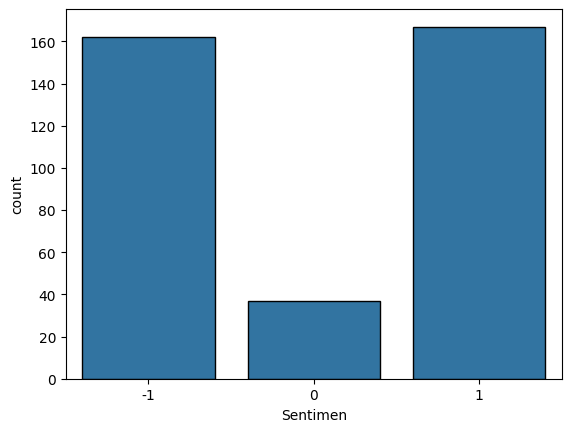

In [18]:
sns.countplot(x='Sentimen', data=df, edgecolor='black')

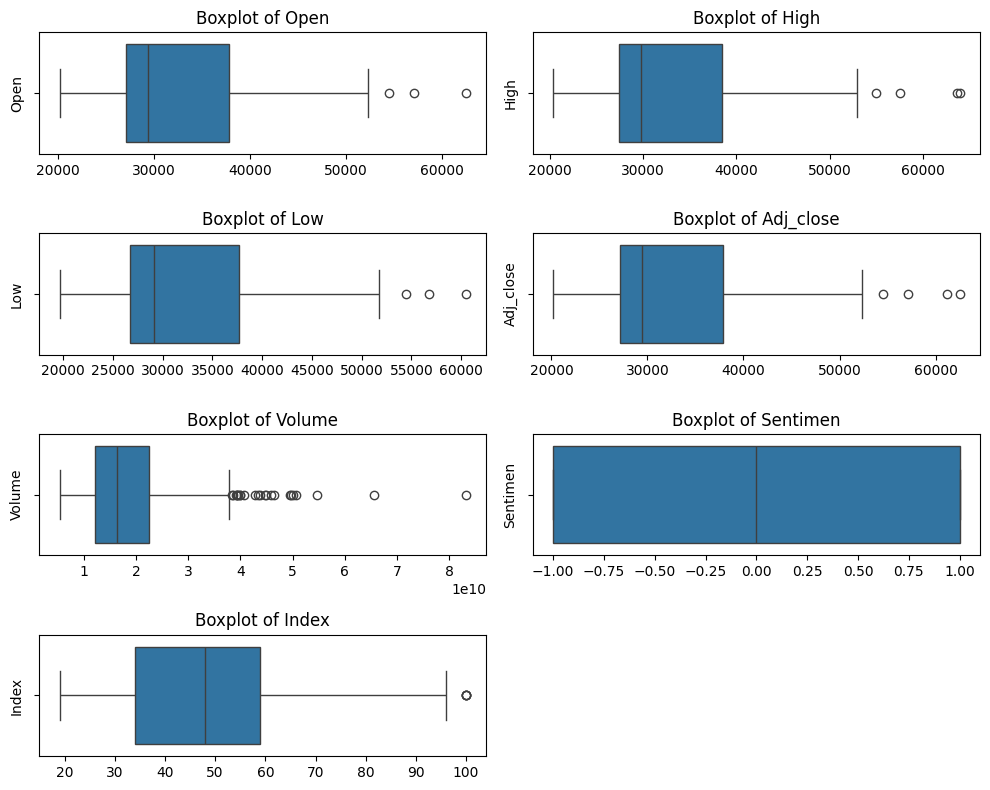

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the number of features and calculate the number of subplots needed
num_features = len(X.columns)
num_rows = (num_features - 1) // 2 + 1
num_cols = min(num_features, 2)

# Create the figure and axis
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 8))

# Flatten the axes if necessary
axes = axes.flatten()

# Loop through each feature and plot the boxplot
for i, feature in enumerate(X.columns):
    ax = axes[i]

    sns.boxplot(data=X, x=feature, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feature.capitalize())
    ax.set_title(f'Boxplot of {feature.capitalize()}')

# Hide any unused subplots
for j in range(i+1, num_rows*num_cols):
    fig.delaxes(axes[j])

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

In [20]:
# Fungsi untuk menghitung banyaknya outlier di kolom tertentu
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers.count()

# Menghitung outlier untuk setiap kolom numerik
outlier_counts = df.apply(count_outliers)

# Membuat DataFrame baru untuk hasilnya
outlier_df = pd.DataFrame({
    'variabel': outlier_counts.index,
    'jumlah outlier': outlier_counts.values
})

outlier_df

,variabel,jumlah outlier
0,Open,3
1,High,4
2,Low,3
3,Adj_Close,4
4,Volume,23
5,Sentimen,0
6,Index,4
7,Close,4


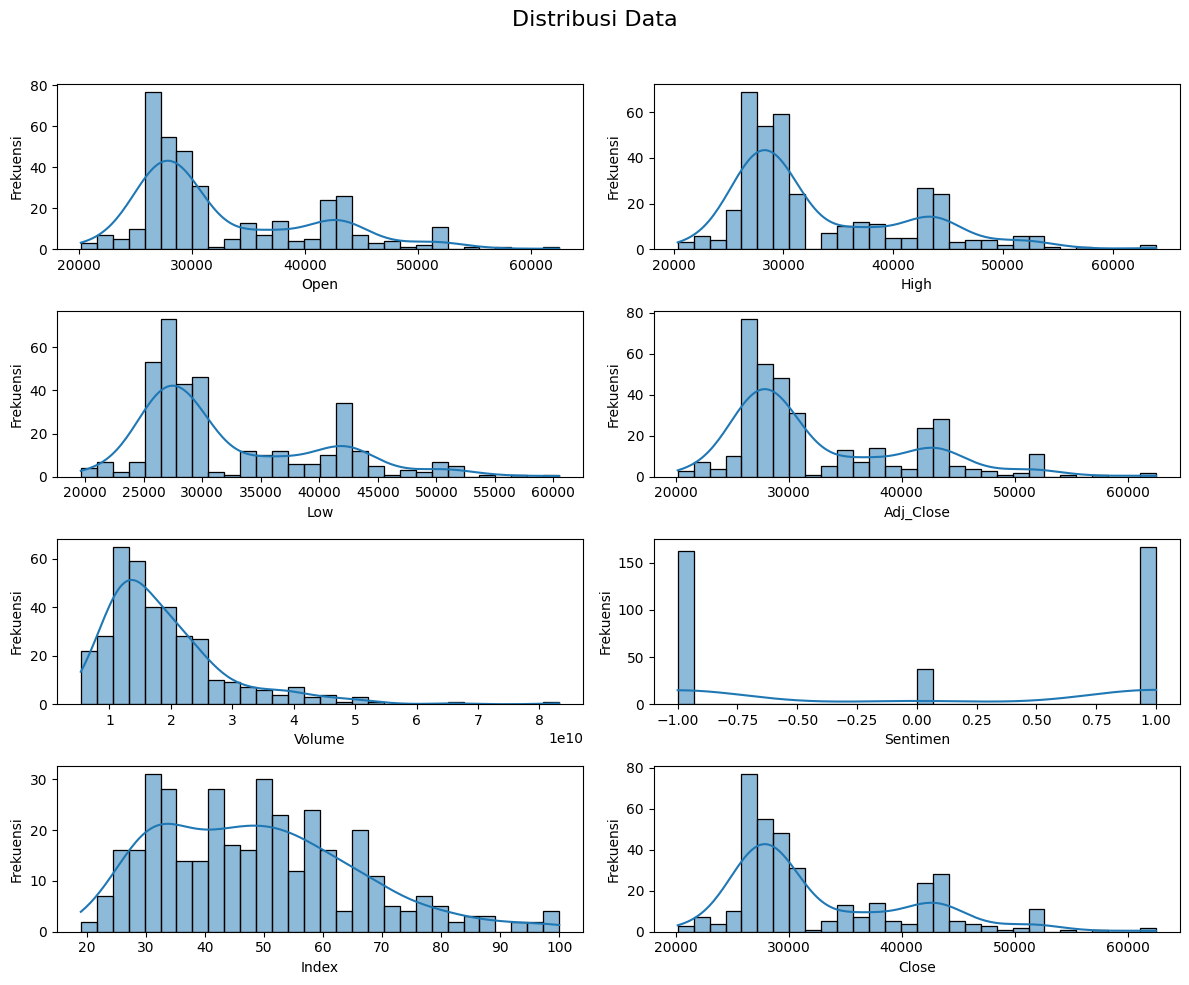

In [21]:
# Mengatur ukuran dan layout plot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
fig.suptitle('Distribusi Data', fontsize=16)

# Membuat plot distribusi untuk masing-masing variabel
sns.histplot(df['Open'], bins=30, kde=True, ax=axes[0, 0]).set(xlabel='Open', ylabel='Frekuensi')
sns.histplot(df['High'], bins=30, kde=True, ax=axes[0, 1]).set(xlabel='High', ylabel='Frekuensi')
sns.histplot(df['Low'], bins=30, kde=True, ax=axes[1, 0]).set(xlabel='Low', ylabel='Frekuensi')
sns.histplot(df['Adj_Close'], bins=30, kde=True, ax=axes[1, 1]).set(xlabel='Adj_Close', ylabel='Frekuensi')
sns.histplot(df['Volume'], bins=30, kde=True, ax=axes[2, 0]).set(xlabel='Volume', ylabel='Frekuensi')
sns.histplot(df['Sentimen'], bins=30, kde=True, ax=axes[2, 1]).set(xlabel='Sentimen', ylabel='Frekuensi')
sns.histplot(df['Index'], bins=30, kde=True, ax=axes[3, 0]).set(xlabel='Index', ylabel='Frekuensi')
sns.histplot(df['Close'], bins=30, kde=True, ax=axes[3, 1]).set(xlabel='Close', ylabel='Frekuensi')

# Mengatur layout agar lebih rapi
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Menampilkan plot
plt.show()

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Adj_Close'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Sentimen'}>],
       [<Axes: title={'center': 'Index'}>,
        <Axes: title={'center': 'Close'}>, <Axes: >]], dtype=object)

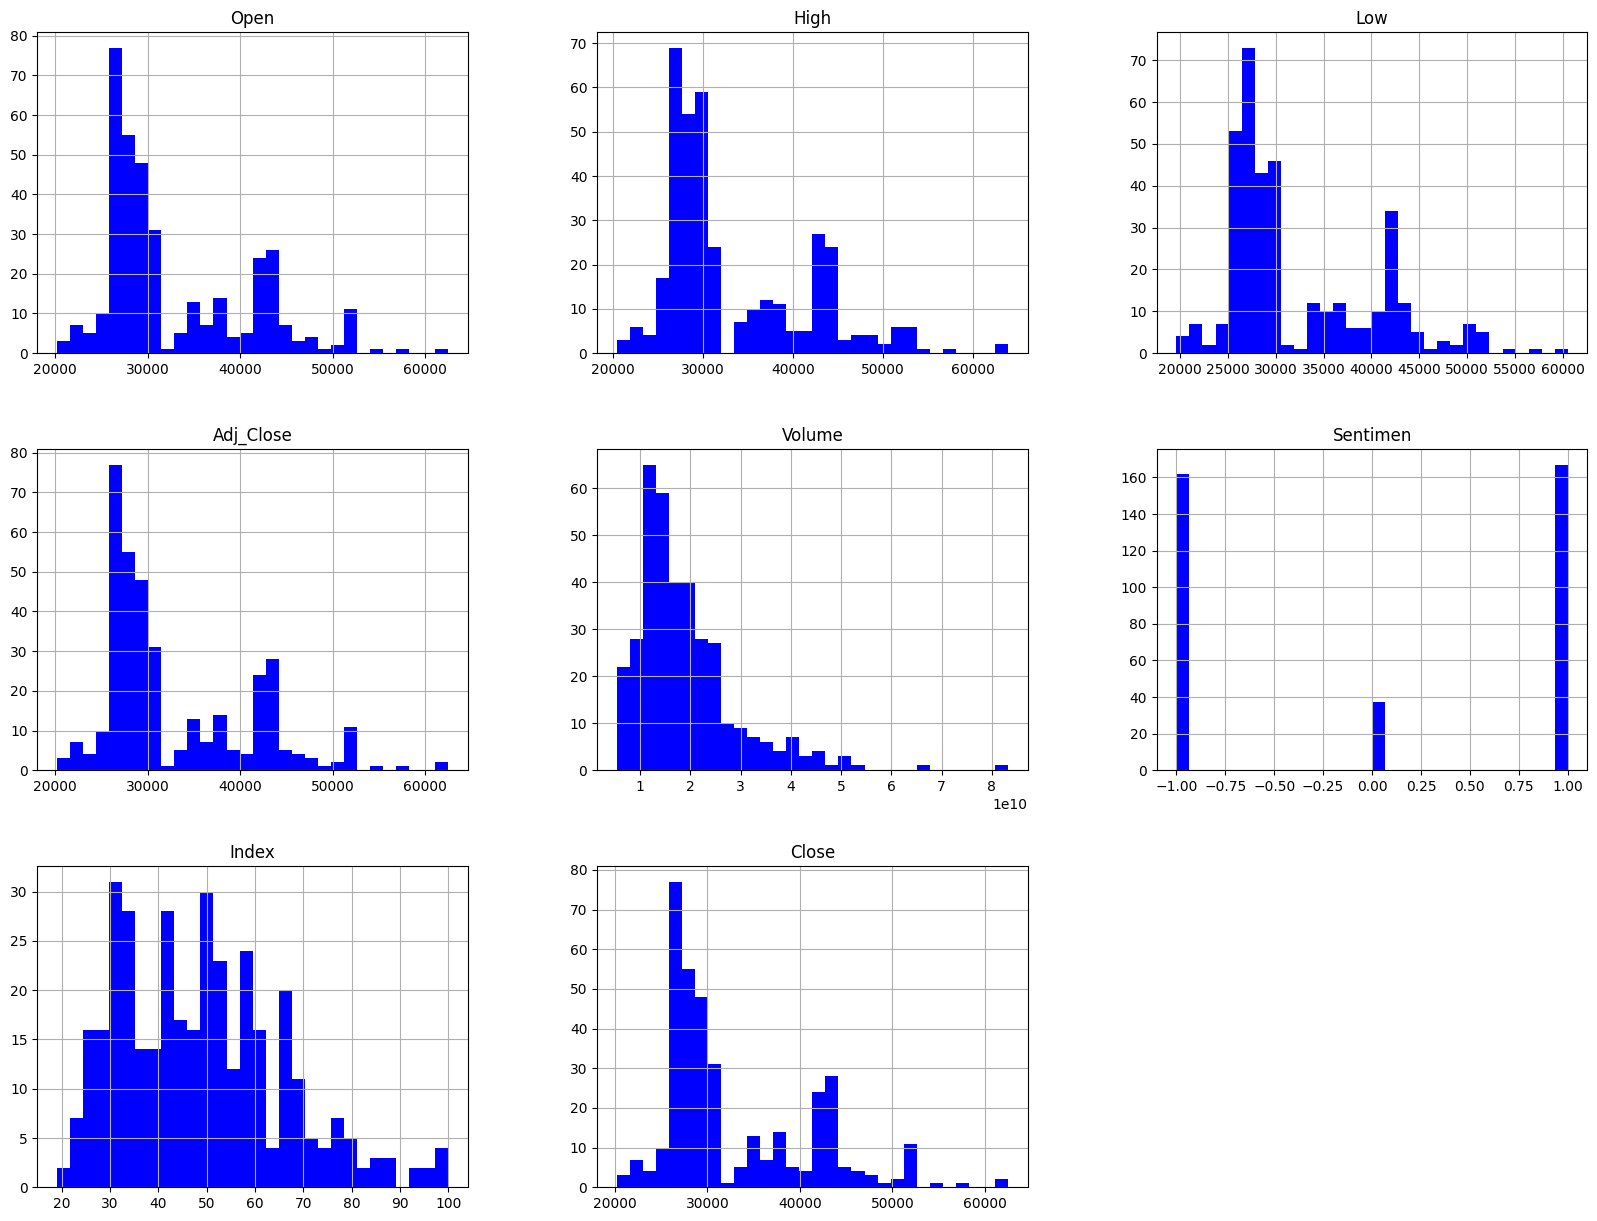

In [22]:
df.hist(bins = 30, figsize=(20, 15), color = 'blue')

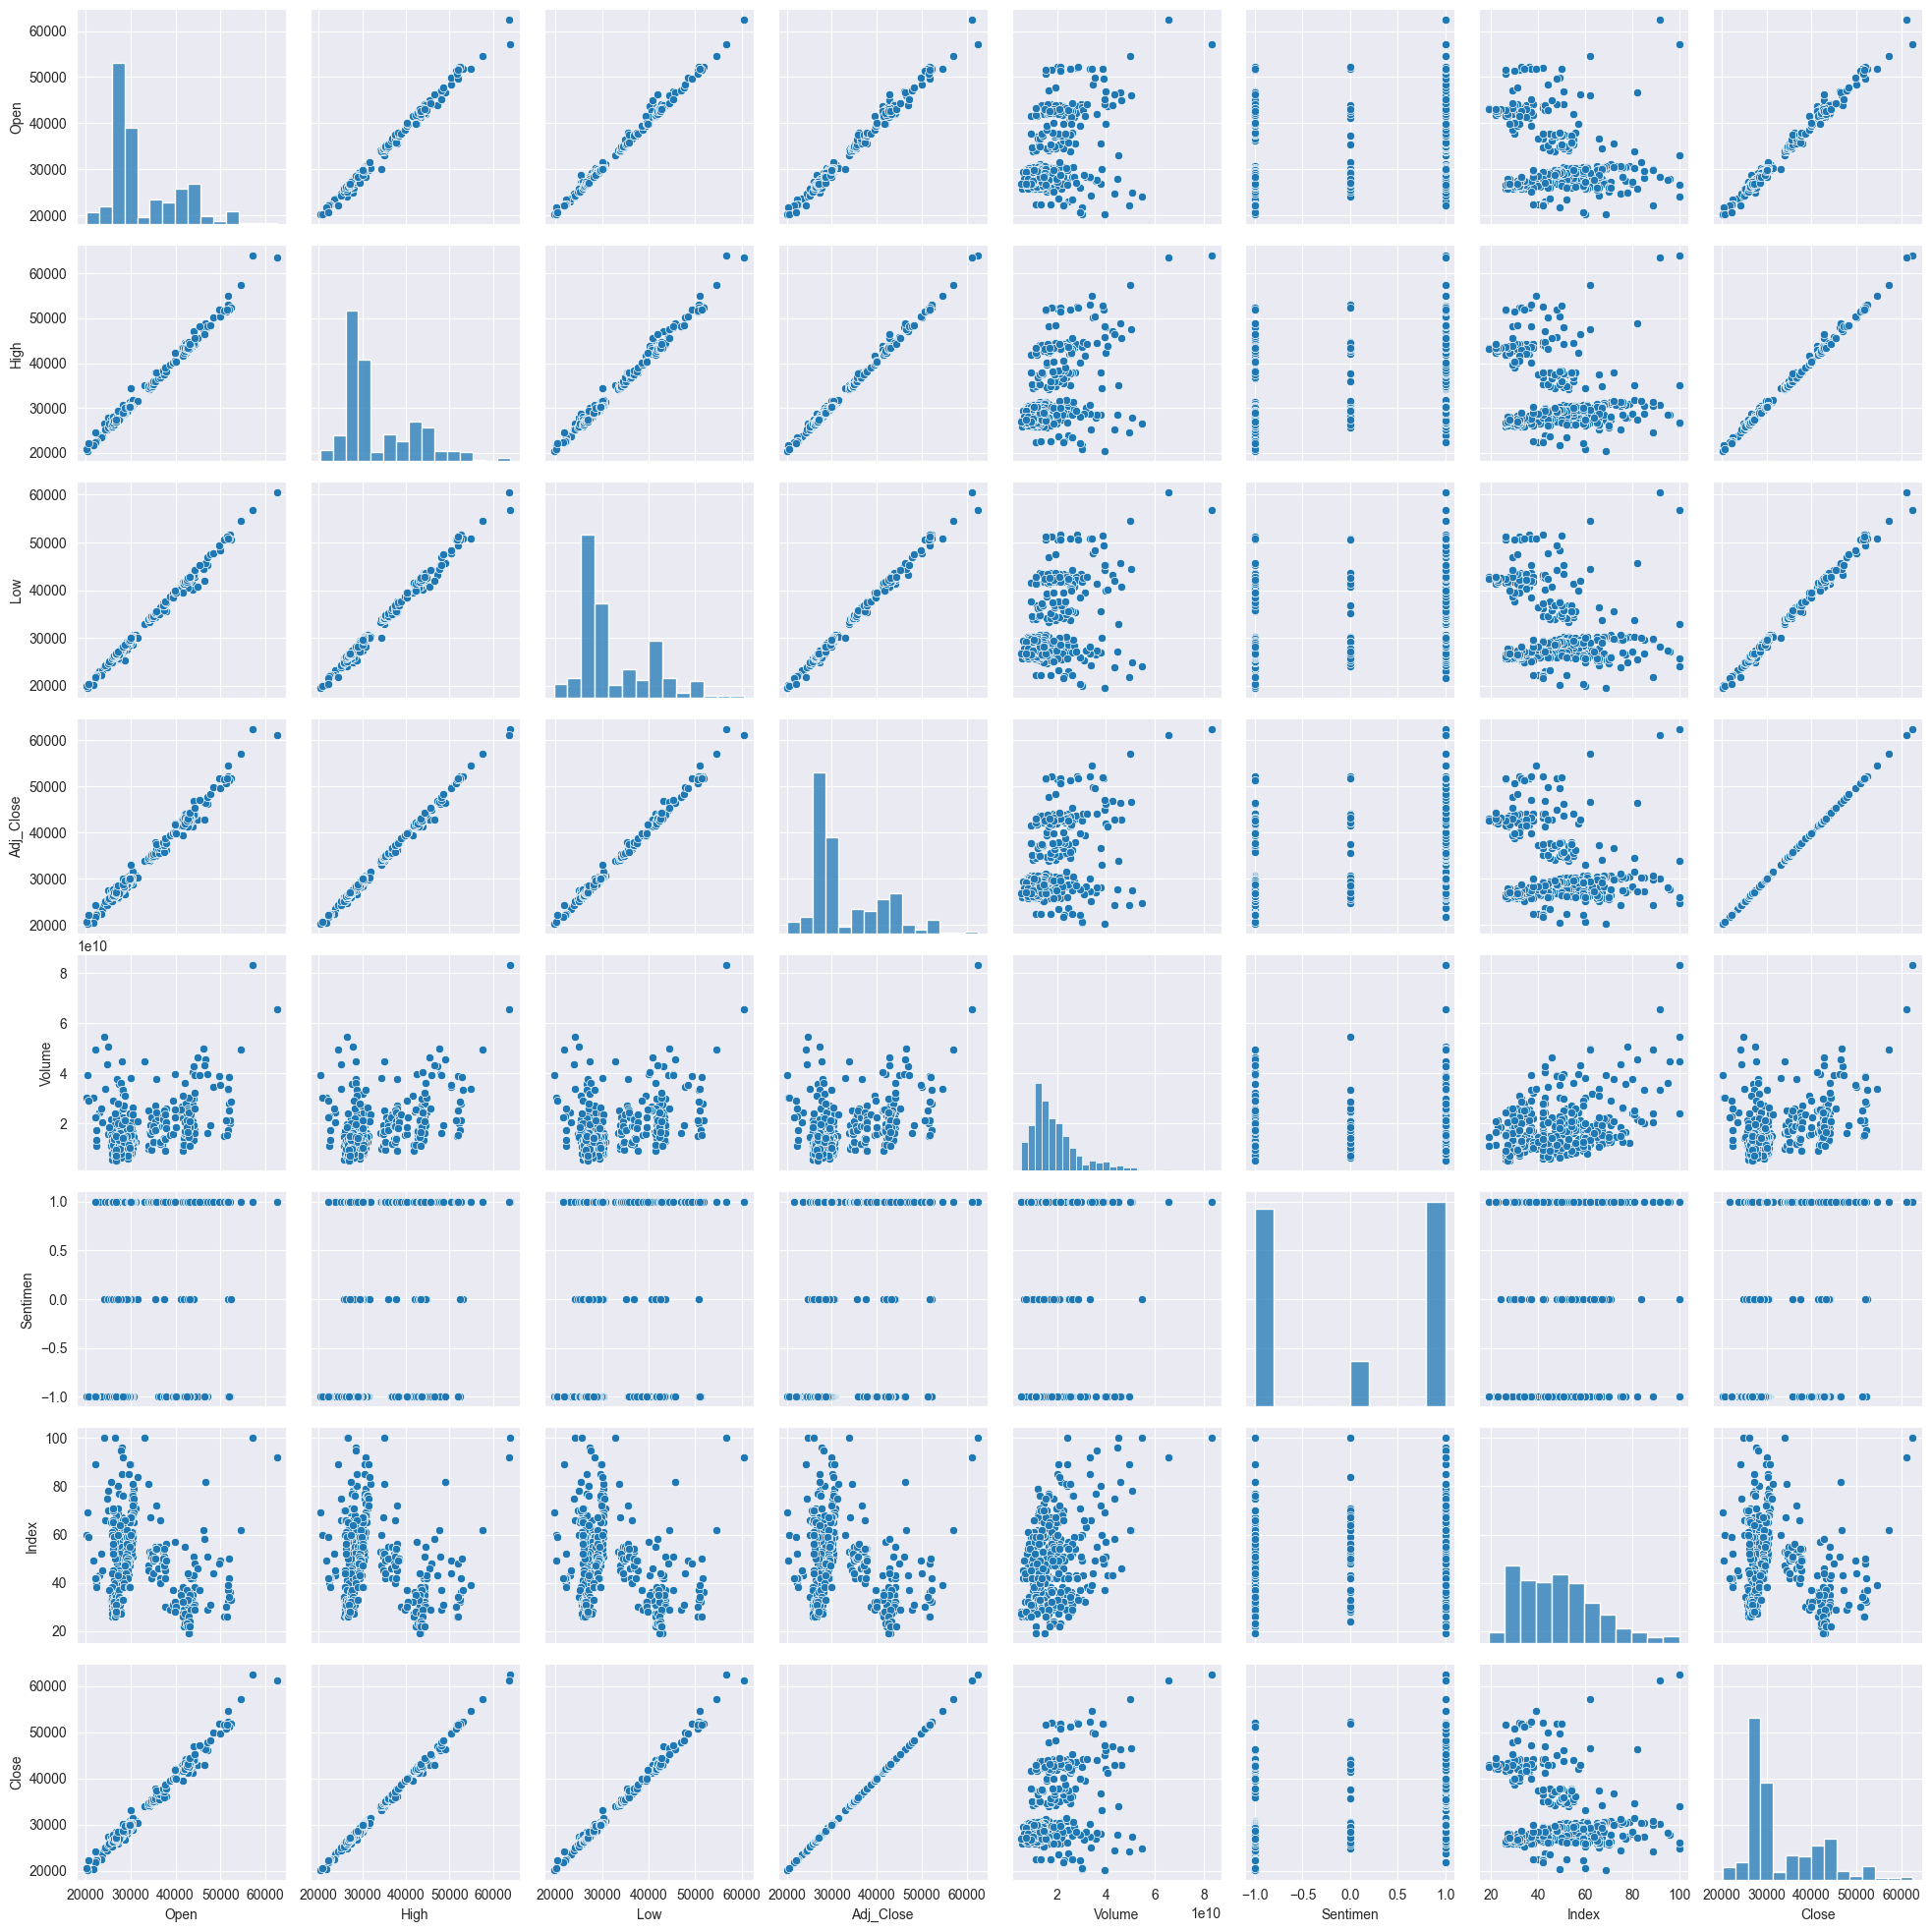

In [23]:
# visualize to see distribution of the data
sns.set_style(style='darkgrid')
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation Heatmap')

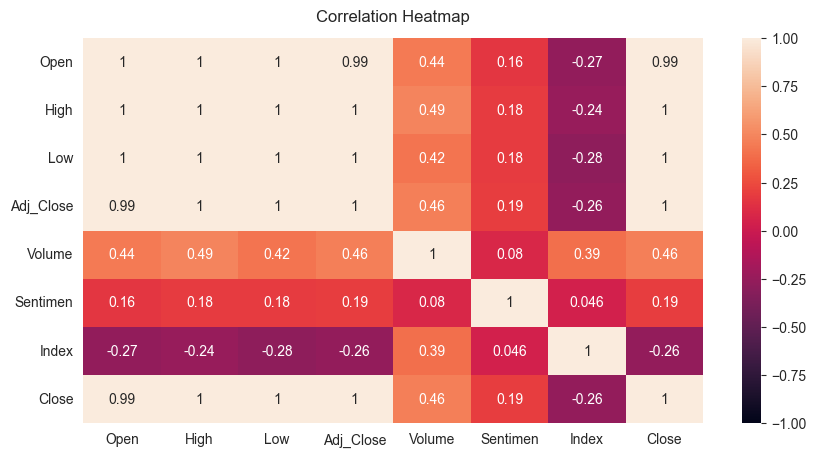

In [24]:
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

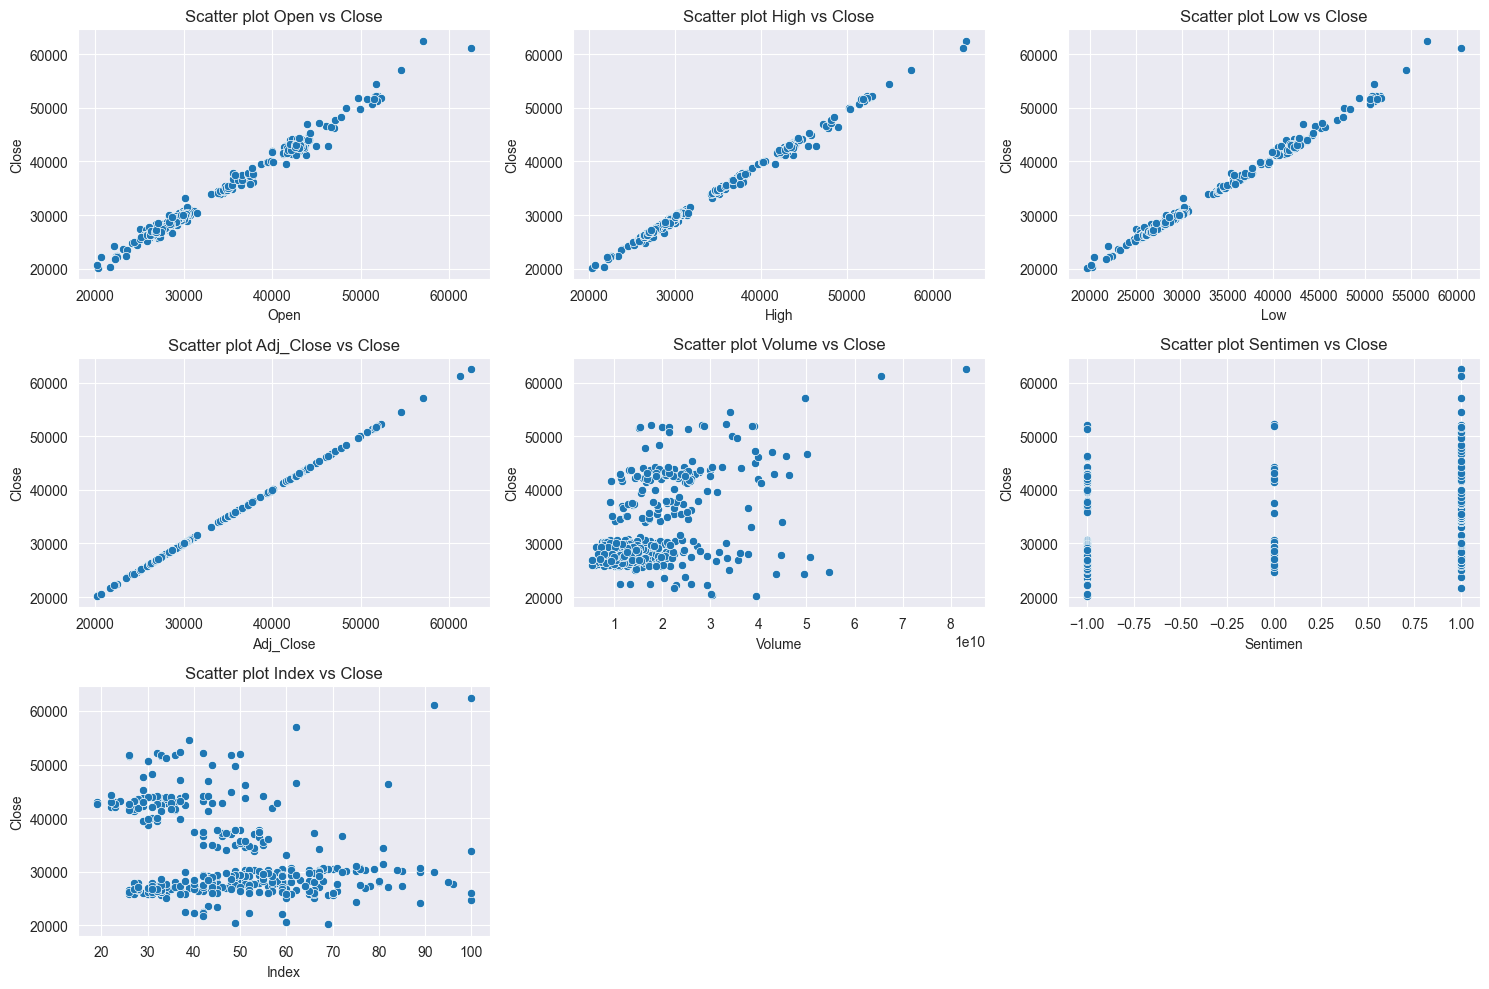

In [25]:
#Scatter Plot
variables = ['Open', 'High', 'Low', 'Adj_Close', 'Volume', 'Sentimen', 'Index']

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(data=df, x=var, y='Close')
    plt.title(f'Scatter plot {var} vs Close')
    plt.xlabel(var)
    plt.ylabel('Close')

plt.tight_layout()
plt.show()

## UJI ASUMSI KLASIK

### UJI LINEARITAS

In [26]:
# Data yang digunakan untuk regresi
X = df[['Open', 'High', 'Low', 'Adj_Close', 'Volume', 'Sentimen']]
y = df['Close']

# Menambahkan kolom konstanta (intercept) ke data X
X = sm.add_constant(X)

# Melakukan regresi OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Melakukan uji Fungsi Bentuk F (uji linearitas)
linear_test = linear_reset(model, power=3)  # Power=3 adalah derajat non-linear yang diuji
p_value = linear_test.pvalue

# Menampilkan hasil uji linearitas
print("Nilai p-value dari uji linearitas (Fungsi Bentuk F):", p_value)

# Interpretasi hasil uji linearitas
if p_value < 0.05:
    print("Terdapat bukti non-linearitas dalam model regresi.")
else:
    print("Tidak terdapat bukti non-linearitas dalam model regresi (asumsi linearitas dapat diterima).")

Nilai p-value dari uji linearitas (Fungsi Bentuk F): 7.563951166429022e-16
Terdapat bukti non-linearitas dalam model regresi.


### UJI NORMALITAS

Menggunakan Uji Kolmogorov Smirnov dengan level signifikansi 5% atau 0,05 dan ketentuannya yaitu :

*  Jika nilai p-value > 5%, maka H0
diterima ; H1 ditolak
*  Jika nilai p-value < 5%, maka H0 ditolak ; H1 diterima

Adapun hipotesisnya sebagai berikut :
*  H0 = Data terdistribusi normal
*  H1 = Data tidak terdistribusi normal


In [27]:
swX1 = shapiro(df['Open'])
swX2 = shapiro(df['High'])
swX3 = shapiro(df['Low'])
swX4 = shapiro(df['Adj_Close'])
swX5 = shapiro(df['Volume'])
swX6 = shapiro(df['Sentimen'])
swX7 = shapiro(df['Index'])
swy = shapiro(df['Close'])

print('Hasil uji normalitas pada variabel Open')
print('==============================================')
print(swX1)
print('\n \nHasil uji normalitas pada variabel High')
print('==============================================')
print(swX2)
print('\n \nHasil uji normalitas pada variabel Low')
print('==============================================')
print(swX3)
print('\n \nHasil uji normalitas pada variabel adj Close')
print('==============================================')
print(swX4)
print('\n \nHasil uji normalitas pada variabel Volume')
print('==============================================')
print(swX5)
print('\n \nHasil uji normalitas pada variabel Sentimen')
print('==============================================')
print(swX6)
print('\n \nHasil uji normalitas pada variabel Index')
print('==============================================')
print(swX7)
print('\n \nHasil uji normalitas pada variabel Close')
print('==============================================')
print(swy)

Hasil uji normalitas pada variabel Open
ShapiroResult(statistic=0.8647543919934049, pvalue=2.5760509707308642e-17)

 
Hasil uji normalitas pada variabel High
ShapiroResult(statistic=0.860975615879378, pvalue=1.4757334370742697e-17)

 
Hasil uji normalitas pada variabel Low
ShapiroResult(statistic=0.868060578240075, pvalue=4.233456116672549e-17)

 
Hasil uji normalitas pada variabel adj Close
ShapiroResult(statistic=0.8622254721009512, pvalue=1.772144461882294e-17)

 
Hasil uji normalitas pada variabel Volume
ShapiroResult(statistic=0.8474696230592123, pvalue=2.195650959194006e-18)

 
Hasil uji normalitas pada variabel Sentimen
ShapiroResult(statistic=0.6966903446236252, pvalue=3.633762035318391e-25)

 
Hasil uji normalitas pada variabel Index
ShapiroResult(statistic=0.9591160151787815, pvalue=1.442612697346666e-08)

 
Hasil uji normalitas pada variabel Close
ShapiroResult(statistic=0.8622254721009512, pvalue=1.772144461882294e-17)


In [28]:
# Menggabungkan semua kolom menjadi satu array
all_data = df.values.flatten()

# Melakukan uji Shapiro-Wilk pada data gabungan
AllData = shapiro(all_data)
print('\n \nHasil uji normalitas pada seluruh data')
print('==============================================')
print(AllData)


 
Hasil uji normalitas pada seluruh data
ShapiroResult(statistic=0.3778690925037683, pvalue=4.2384633743911763e-72)


### UJI MULTIKOLINEARITAS

Gejala  adanya  multikoliniearitas  antara  lain  dengan  melihat  nilai Variance  Inflation  Factor(VIF)  dan Tolerancenya.Jika  nilai VIF<  10  dan Tolerance>  0,1  maka dinyatakan tidak terjadi multikolinearitas

In [29]:
# Data yang ingin diuji multikolinearitas
data = df[['Open', 'High', 'Low', 'Adj_Close', 'Volume', 'Sentimen', 'Index']]

# Menambahkan kolom konstanta untuk perhitungan VIF
data['Intercept'] = 1

# Menghitung VIF untuk setiap variabel
vif = pd.DataFrame()
vif["Variabel"] = data.columns
vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

# Menampilkan hasil VIF
print(vif)

    Variabel          VIF
0       Open   535.921957
1       High  1163.219720
2        Low   803.831378
3  Adj_Close   937.047726
4     Volume     4.817110
5   Sentimen     1.176372
6      Index     1.727153
7  Intercept    48.139974


### UJI HETEROSKEDASTISITAS

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Data yang digunakan untuk regresi
X = df[['Open', 'High', 'Low', 'Adj_Close', 'Volume', 'Sentimen', 'Index']]
y = df['Close']

# Menambahkan kolom konstanta (intercept) ke data X
X = sm.add_constant(X)

# Melakukan regresi OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Melakukan uji Glejser
formula = 'np.abs(model.resid) ~ Open + High + Low + Adj_Close + Volume + Sentimen + Index'
glejser_test = smf.ols(formula=formula, data=df).fit()

# Menampilkan hasil uji Glejser
print(glejser_test.summary())

# Interpretasi hasil uji Glejser
if glejser_test.pvalues[1] < 0.05:
    print("Terdapat bukti heteroskedastisitas (menolak asumsi homoskedastisitas).")
else:
    print("Tidak terdapat bukti heteroskedastisitas (asumsi homoskedastisitas dapat diterima).")


                             OLS Regression Results                            
Dep. Variable:     np.abs(model.resid)   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                  1.000
Method:                  Least Squares   F-statistic:                 1.654e+11
Date:                 Tue, 29 Oct 2024   Prob (F-statistic):               0.00
Time:                         20:36:47   Log-Likelihood:                 9271.3
No. Observations:                  366   AIC:                        -1.853e+04
Df Residuals:                      358   BIC:                        -1.850e+04
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.05e-11   8.85e-13     23.16

### UJI AUTOKORELASI

In [31]:
import statsmodels.api as sm

# Data yang digunakan untuk regresi
X = df[['Open', 'High', 'Low', 'Adj_Close', 'Volume', 'Sentimen', 'Index']]
y = df['Close']

# Menambahkan kolom konstanta (intercept) ke data X
X = sm.add_constant(X)

# Melakukan regresi OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Melakukan uji Durbin-Watson
dw_test = sm.stats.stattools.durbin_watson(model.resid)

# Menampilkan hasil uji Durbin-Watson
print("Nilai statistik Durbin-Watson (DW):", dw_test)

# Interpretasi hasil uji Durbin-Watson
if dw_test < 2:
    print("Terjadi Autokorelasi positif (residu cenderung berkorelasi positif).")
elif dw_test > 2:
    print("Terjadi Autokorelasi negatif (residu cenderung berkorelasi negatif).")
else:
    print("Tidak terjadi autokorelasi yang signifikan dalam residu.")

Nilai statistik Durbin-Watson (DW): 0.1247394135635753
Terjadi Autokorelasi positif (residu cenderung berkorelasi positif).
